In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import re

plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df_new = pd.read_csv('data/listings_september.csv')

In [3]:
def clean_price(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert price objects into int64.
    '''
    
    for column in list_of_columns:
        dataframe[column] = dataframe[column].str[1:]
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').fillna(0)
        dataframe[column] = dataframe[column].astype('int64')
    return dataframe

df_new = clean_price(df_new, ['price', 'security_deposit', 'cleaning_fee', 'extra_people'])

In [4]:
def make_datetime_object(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert date objects into datetime.
    '''
    
    for column in list_of_columns:
        dataframe[column] = pd.to_datetime(dataframe[column], format = '%m-%d-%Y', errors ='ignore')
        dataframe[column] = dataframe[column].astype('datetime64')
    return dataframe

now = datetime.datetime.now().date()
#print(now)

df_new['now'] = now

df_new = make_datetime_object(df_new, ['host_since', 'first_review', 'last_review', 'now'])


df_new['review_period'] = (df_new['last_review'] - df_new['first_review']).astype('timedelta64[D]')
df_new['number_of_days_as_host'] = (df_new['now'] - df_new['host_since']).astype('timedelta64[D]')

In [10]:
def clean_zipcode(dataframe):
    dataframe['zipcode_clean'] = dataframe['zipcode'].str[:5]
    dataframe['zipcode_clean'] = dataframe['zipcode_clean'].astype('float')
    dataframe.rename(columns = {'zipcode' : 'zipcode_old','zipcode_clean': 'zipcode'}, inplace=True)
    
    return dataframe

clean_zipcode(df_new)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,now,review_period,Number_of_days_as_host,zipcode
0,2384,https://www.airbnb.com/rooms/2384,20180914083817,2018-09-14,Hyde Park-Walk to UChicago or Theological Semi...,"As the sole guest in my quiet, vintage (1924) ...","The spacious bedroom has a queen size bed, che...","As the sole guest in my quiet, vintage (1924) ...",none,My building is located one block from beautifu...,...,f,strict_14_with_grace_period,f,f,1,2.94,2018-10-15,1311.0,3699.0,60637.0
1,4505,https://www.airbnb.com/rooms/4505,20180914083817,2018-09-14,1 Great Apartment. 352 Great Reviews. 1 bad one.,Across the street from CTA train. Runs every 6...,"We travel a lot, we know what people need. We...",Across the street from CTA train. Runs every 6...,none,NaN,...,f,moderate,f,f,1,3.09,2018-10-15,3449.0,3577.0,60608.0
2,6715,https://www.airbnb.com/rooms/6715,20180914083817,2018-09-14,Lincoln Park Oasis - Unit 2 ONLY,Unit 1 & Unit 2 are rented separately. They ca...,License #: (Phone number hidden by Airbnb) Be...,Unit 1 & Unit 2 are rented separately. They ca...,none,Things To Do & Close to: - An awesome Children...,...,f,strict_14_with_grace_period,f,f,2,0.82,2018-10-15,3353.0,3455.0,60614.0
3,7126,https://www.airbnb.com/rooms/7126,20180914083817,2018-09-14,Tiny Studio Apartment 94 Walk Score,NaN,This is a very small studio apartment with a ...,This is a very small studio apartment with a ...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,moderate,f,f,1,2.78,2018-10-15,3342.0,3436.0,60622.0
4,9811,https://www.airbnb.com/rooms/9811,20180914083817,2018-09-14,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,f,strict_14_with_grace_period,f,f,9,0.56,2018-10-15,1581.0,3342.0,60614.0
5,10610,https://www.airbnb.com/rooms/10610,20180914083817,2018-09-14,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,Newly furnished with queen bed and the comfort...,The condo is the 2nd floor in a lovely 1912 3-...,none,It's a 10 minute walk from the lakefront bike ...,...,f,moderate,f,f,6,0.65,2018-10-15,1373.0,3712.0,60615.0
6,10945,https://www.airbnb.com/rooms/10945,20180914083817,2018-09-14,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,This 1st floor apartment has a queen size bed ...,Beautiful first floor apartment in Historic Ol...,none,NaN,...,f,strict_14_with_grace_period,f,f,9,0.15,2018-10-15,1574.0,3342.0,60614.0
7,12068,https://www.airbnb.com/rooms/12068,20180914083817,2018-09-14,Chicago GOLD COAST 1 Bedroom Condo,"Located in Chicago's Gold Coast / Old Town, st...",ONE MONTH MINIMUM. Parking available. Well-ap...,"Located in Chicago's Gold Coast / Old Town, st...",none,The condo is on Lasalle just off of Division; ...,...,f,strict_14_with_grace_period,f,f,2,0.19,2018-10-15,969.0,3309.0,60610.0
8,12140,https://www.airbnb.com/rooms/12140,20180914083817,2018-09-14,Lincoln Park Guest House,NaN,Luxurious and modern accommodations in the hea...,Luxurious and modern accommodations in the hea...,none,The Guest House is in the heart of Chicago's m...,...,f,moderate,f,f,1,0.10,2018-10-15,1071.0,3284.0,60614.0
9,22362,https://www.airbnb.com/rooms/22362,20180914083817,2018-09-14,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,Fantastic condo in a Great Location with cover...,Our home is Fully Furnished & Equipped!! Just...,Fantastic condo in a Great Location with cover...,none,"Our home overlooks the park and is on a quiet,...",...,f,moderate,f,t,1,0.15,2018-10-15,308.0,3153.0,60642.0


In [5]:
def clean_amenities(dataframe):
    
    dataframe['amenities'] = [value[1:-1] for value in dataframe['amenities']]
    dataframe['amenities'] = [value.split(',') for value in dataframe['amenities']]
    
    return dataframe

clean_amenities(df_new)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,now,review_period,Number_of_days_as_host
0,2384,https://www.airbnb.com/rooms/2384,20180914083817,2018-09-14,Hyde Park-Walk to UChicago or Theological Semi...,"As the sole guest in my quiet, vintage (1924) ...","The spacious bedroom has a queen size bed, che...","As the sole guest in my quiet, vintage (1924) ...",none,My building is located one block from beautifu...,...,f,f,strict_14_with_grace_period,f,f,1,2.94,2018-10-15,1311.0,3699.0
1,4505,https://www.airbnb.com/rooms/4505,20180914083817,2018-09-14,1 Great Apartment. 352 Great Reviews. 1 bad one.,Across the street from CTA train. Runs every 6...,"We travel a lot, we know what people need. We...",Across the street from CTA train. Runs every 6...,none,NaN,...,t,f,moderate,f,f,1,3.09,2018-10-15,3449.0,3577.0
2,6715,https://www.airbnb.com/rooms/6715,20180914083817,2018-09-14,Lincoln Park Oasis - Unit 2 ONLY,Unit 1 & Unit 2 are rented separately. They ca...,License #: (Phone number hidden by Airbnb) Be...,Unit 1 & Unit 2 are rented separately. They ca...,none,Things To Do & Close to: - An awesome Children...,...,f,f,strict_14_with_grace_period,f,f,2,0.82,2018-10-15,3353.0,3455.0
3,7126,https://www.airbnb.com/rooms/7126,20180914083817,2018-09-14,Tiny Studio Apartment 94 Walk Score,NaN,This is a very small studio apartment with a ...,This is a very small studio apartment with a ...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,f,moderate,f,f,1,2.78,2018-10-15,3342.0,3436.0
4,9811,https://www.airbnb.com/rooms/9811,20180914083817,2018-09-14,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,f,strict_14_with_grace_period,f,f,9,0.56,2018-10-15,1581.0,3342.0
5,10610,https://www.airbnb.com/rooms/10610,20180914083817,2018-09-14,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,Newly furnished with queen bed and the comfort...,The condo is the 2nd floor in a lovely 1912 3-...,none,It's a 10 minute walk from the lakefront bike ...,...,t,f,moderate,f,f,6,0.65,2018-10-15,1373.0,3712.0
6,10945,https://www.airbnb.com/rooms/10945,20180914083817,2018-09-14,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,This 1st floor apartment has a queen size bed ...,Beautiful first floor apartment in Historic Ol...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,9,0.15,2018-10-15,1574.0,3342.0
7,12068,https://www.airbnb.com/rooms/12068,20180914083817,2018-09-14,Chicago GOLD COAST 1 Bedroom Condo,"Located in Chicago's Gold Coast / Old Town, st...",ONE MONTH MINIMUM. Parking available. Well-ap...,"Located in Chicago's Gold Coast / Old Town, st...",none,The condo is on Lasalle just off of Division; ...,...,f,f,strict_14_with_grace_period,f,f,2,0.19,2018-10-15,969.0,3309.0
8,12140,https://www.airbnb.com/rooms/12140,20180914083817,2018-09-14,Lincoln Park Guest House,NaN,Luxurious and modern accommodations in the hea...,Luxurious and modern accommodations in the hea...,none,The Guest House is in the heart of Chicago's m...,...,f,f,moderate,f,f,1,0.10,2018-10-15,1071.0,3284.0
9,22362,https://www.airbnb.com/rooms/22362,20180914083817,2018-09-14,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,Fantastic condo in a Great Location with cover...,Our home is Fully Furnished & Equipped!! Just...,Fantastic condo in a Great Location with cover...,none,"Our home overlooks the park and is on a quiet,...",...,f,f,moderate,f,t,1,0.15,2018-10-15,308.0,3153.0


In [7]:
df_new.groupby('host_is_superhost')['price'].mean()

host_is_superhost
f    135.266331
t    128.944572
Name: price, dtype: float64

TypeError: <lambda>() missing 1 required positional argument: 'height'

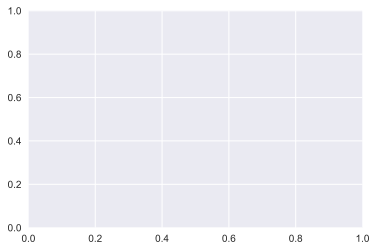

In [16]:
zipcd = df_new.groupby('zipcode')['price'].median()

zipcd.sort_values()

#plt.bar(zipcd);

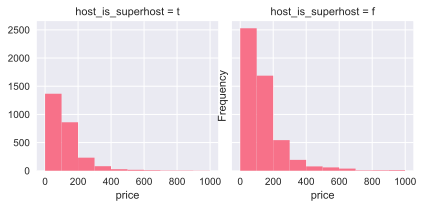

In [44]:
g = sns.FacetGrid(df_new, col='host_is_superhost', sharex=True) # for conditional relationships
g.map(plt.hist, "price");
plt.ylabel('Frequency');
#plt.figure(figsize=(20,10));
plt.savefig('superhost_price.png', dpi =300);

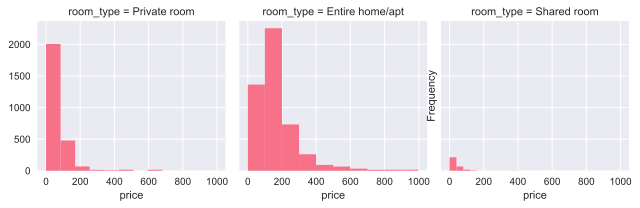

In [45]:
g = sns.FacetGrid(df_new, col='room_type', sharex=True) # for conditional relationships

g.map(plt.hist, "price");
plt.ylabel('Frequency');
#plt.figure(figsize=(20,10));
plt.savefig('room_type_price.png', dpi=300)